# Exercises: Introduction to Pairs Trading
By Chris Fenaroli, Delaney Mackenzie, and Maxwell Margenot

## Lecture Link
This exercise notebook refers to this lecture. Please use the lecture for explanations and sample code.

https://www.quantopian.com/lectures#Introduction-to-Pairs-Trading

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

In [3]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt

## Helper Functions

In [4]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

# Exercise 1: Testing Artificial Examples
We'll use some artificially generated series first as they are much cleaner and easier to work with. In general when learning or developing a new technique, use simulated data to provide a clean environment. Simulated data also allows you to control the level of noise and difficulty level for your model.

## a. Cointegration Test I
Determine whether the following two artificial series $A$ and $B$ are cointegrated using the `coint()` function and a reasonable confidence level.

1.47558268216e-13


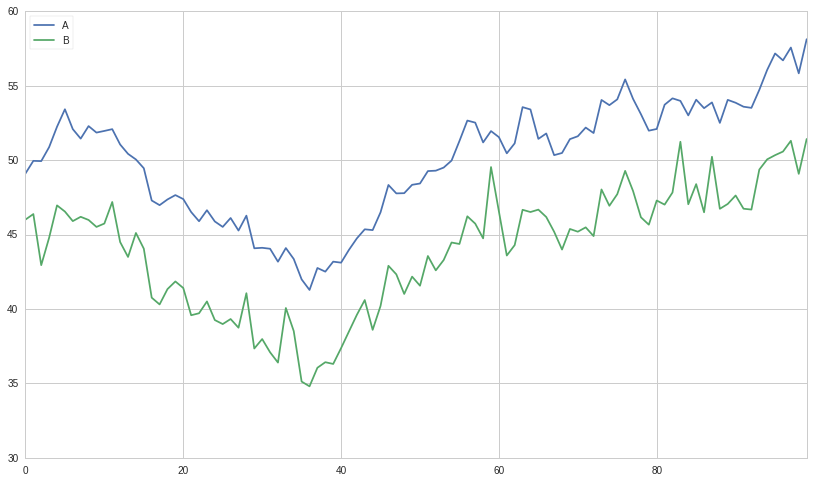

In [11]:
A_returns = np.random.normal(0, 1, 100)
A = pd.Series(np.cumsum(A_returns), name='X') + 50

some_noise = np.random.exponential(1, 100)

B = A - 7 + some_noise

#Your code goes here
score, pvalue, _ = coint(A,B)
print pvalue
# our confidence level is 0.05. We see a p-value below our cutoff and we indicate that
# A and B are conintegrated.
A.name = 'A';
B.name = 'B';
pd.concat([A, B], axis=1).plot();

## b. Cointegration Test II
Determine whether the following two artificial series $C$ and $D$ are cointegrated using the `coint()` function and a reasonable confidence level.

0.210971468487


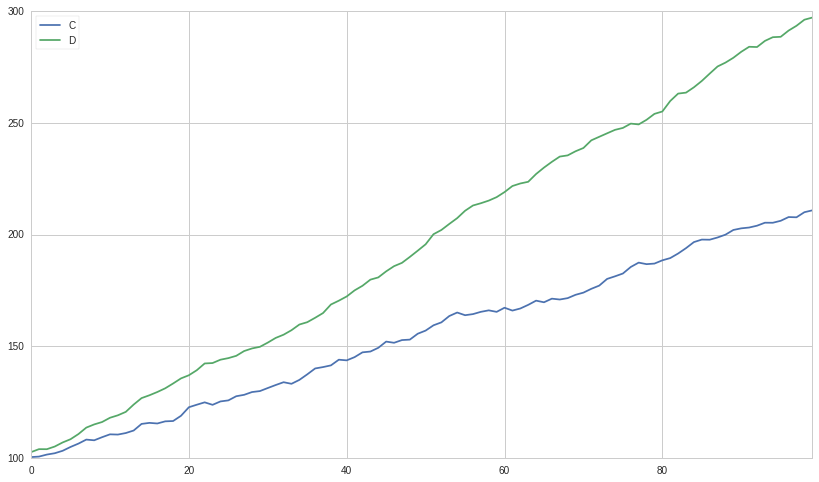

In [13]:
C_returns = np.random.normal(1, 1, 100) 
C = pd.Series(np.cumsum(C_returns), name='X') + 100

D_returns = np.random.normal(2, 1, 100)
D = pd.Series(np.cumsum(D_returns), name='X') + 100

#Your code goes here
score, pvalue, _ = coint(C,D)
print pvalue
# our confidence level is 0.05. We see a p-value not below our cutoff and we indicate that
# C and D are not conintegrated.
C.name = 'C';
D.name = 'D';
pd.concat([C, D], axis=1).plot();

# Exercise 2: Testing Real Examples
## a. Real Cointegration Test I
Determine whether the following two assets `UAL` and `AAL` were cointegrated during 2015 using the `coint()` function and a reasonable confidence level.

0.11339061615


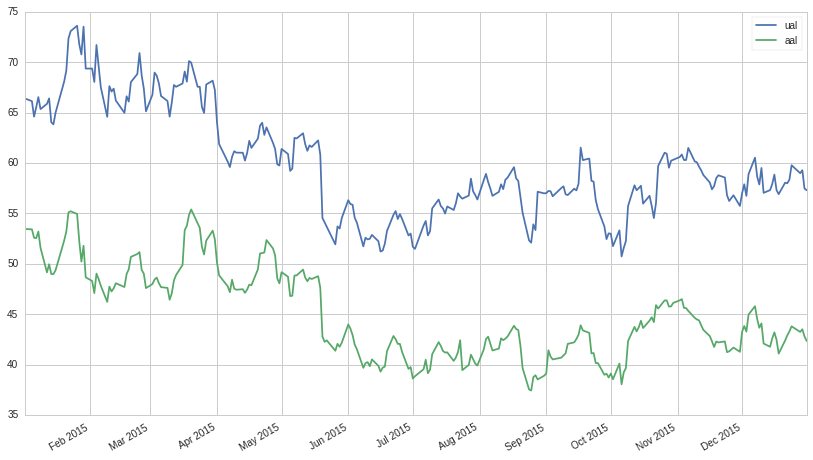

In [17]:
ual = get_pricing('UAL', fields=['price'], 
                        start_date='2015-01-01', end_date='2016-01-01')['price']
aal = get_pricing('AAL', fields=['price'], 
                        start_date='2015-01-01', end_date='2016-01-01')['price']

#Your code goes here
score, pvalue, _ = coint(ual,aal)
print pvalue
# our confidence level is 0.05. We see a p-value not below our cutoff and we indicate that
# ual and aal are not conintegrated.
ual.name = 'ual';
aal.name = 'aal';
pd.concat([ual, aal], axis=1).plot();

## b. Real Cointegration Test II
Determine whether the following two assets `FCAU` and `HMC` were cointegrated during 2015 using the `coint()` function and a reasonable confidence level.

0.013687770819


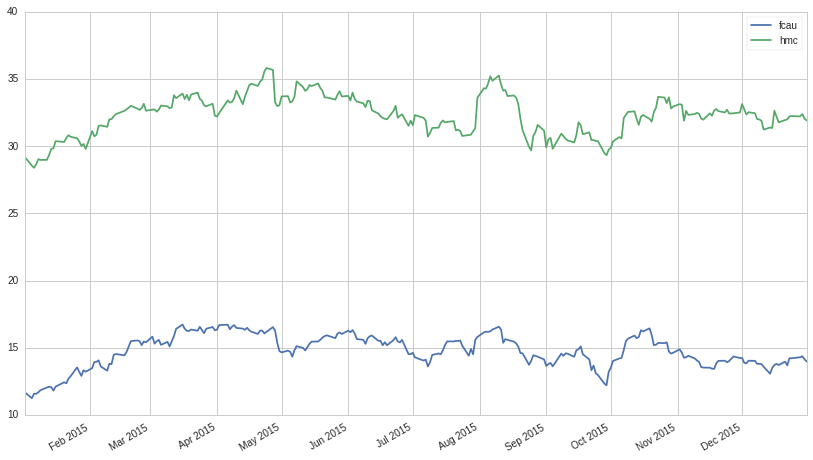

In [20]:
fcau = get_pricing('FCAU', fields=['price'], 
                        start_date='2015-01-01', end_date='2016-01-01')['price']
hmc = get_pricing('HMC', fields=['price'], 
                        start_date='2015-01-01', end_date='2016-01-01')['price']

#Your code goes here
score, pvalue, _ = coint(fcau,hmc)
print pvalue
# our confidence level is 0.05. We see a p-value below our cutoff and we indicate that
# fcau and hmc are not conintegrated.
fcau.name = 'fcau';
hmc.name = 'hmc';
pd.concat([fcau, hmc], axis=1).plot();

# Exercise 3: Searching for Cointegrated Pairs
Use the `find_cointegrated_pairs` function, defined in the "Helper Functions" section above, to find any cointegrated pairs among a set of metal and mining securities.

[(u'MTRN', u'SCCO')]


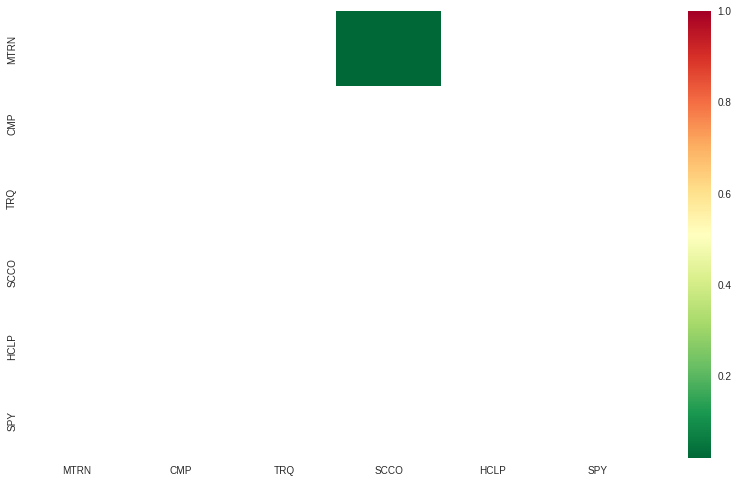

In [22]:
symbol_list = ['MTRN', 'CMP', 'TRQ', 'SCCO', 'HCLP','SPY']
prices_df = get_pricing(symbol_list, fields=['price']
                               , start_date='2015-01-01', end_date='2016-01-01')['price']
prices_df.columns = map(lambda x: x.symbol, prices_df.columns)

#Your code goes here
prices_df.head()

# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(prices_df)
import seaborn
seaborn.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print pairs

# Exercise 4: Out of Sample Validation
## a. Calculating the Spread
Using pricing data from 2015, construct a linear regression to find a coefficient for the linear combination of `MTRN` and `SCCO` that makes their spread stationary.

0.021958661979
2015-01-02 00:00:00+00:00    12.543960
2015-01-05 00:00:00+00:00    11.539575
2015-01-06 00:00:00+00:00    11.810891
2015-01-07 00:00:00+00:00    12.244667
2015-01-08 00:00:00+00:00    12.644159
2015-01-09 00:00:00+00:00    12.977140
2015-01-12 00:00:00+00:00    12.610891
2015-01-13 00:00:00+00:00    11.627723
2015-01-14 00:00:00+00:00    10.631096
2015-01-15 00:00:00+00:00    10.941669
2015-01-16 00:00:00+00:00    11.873674
2015-01-20 00:00:00+00:00    11.655699
2015-01-21 00:00:00+00:00    12.626378
2015-01-22 00:00:00+00:00    12.653461
2015-01-23 00:00:00+00:00    11.850852
2015-01-26 00:00:00+00:00    11.935493
2015-01-27 00:00:00+00:00    11.406763
2015-01-28 00:00:00+00:00    11.693353
2015-01-29 00:00:00+00:00    11.463004
2015-01-30 00:00:00+00:00    12.240196
2015-02-02 00:00:00+00:00    11.957179
2015-02-03 00:00:00+00:00    12.408744
2015-02-04 00:00:00+00:00    12.647922
2015-02-05 00:00:00+00:00    12.842168
2015-02-06 00:00:00+00:00    12.524296
2015-02-09

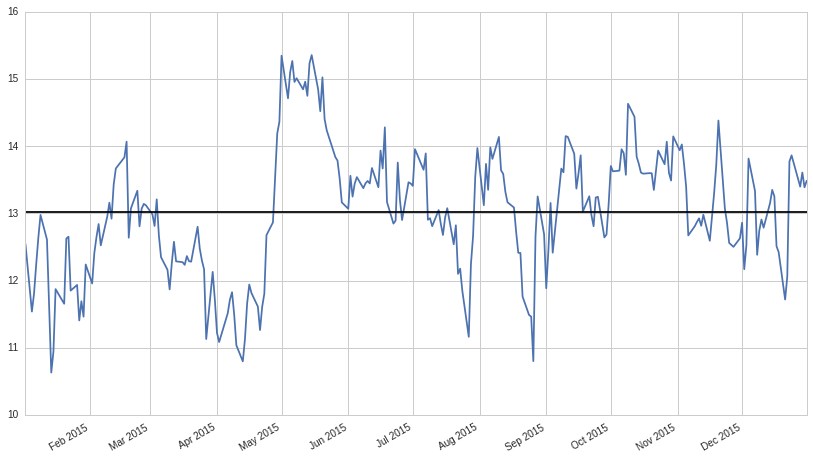

In [28]:
S1 = prices_df['MTRN']
S2 = prices_df['SCCO']

#Your code goes here
score, pvalue, _ = coint(S1, S2)
pvalue
#calculate the spread
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['MTRN']
b = results.params['MTRN']

spread = S2 - b * S1;
spread.plot();
plt.axhline(spread.mean(), color='black');
print pvalue
print spread

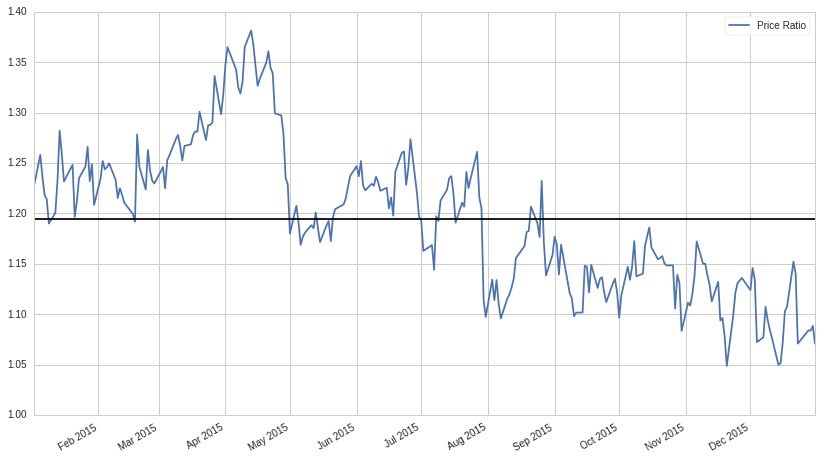

In [29]:
ratio = S1/S2
ratio.plot()
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

## b. Testing the Coefficient
Use your coefficient from part a to plot the weighted spread using prices from the first half of 2016, and check whether the result is still stationary.

In [30]:
S1_out = get_pricing('MTRN', fields=['price'], 
                        start_date='2016-01-01', end_date='2016-07-01')['price']
S2_out = get_pricing('SCCO', fields=['price'], 
                        start_date='2016-01-01', end_date='2016-07-01')['price']

#Your code goes here
score, pvalue, _ = coint(S1_out, S2_out)
print 'p-value: ', pvalue
# Unfortunately, since our p-value is above the cutoff of  0.05, we conclude that
# our model will no longer be valid due to the lack of cointegration between our chosen securities.

p-value:  0.0513544985919


# Extra Credit Exercise: Hurst Exponent
This exercise is more difficult and we will not provide initial structure.

The Hurst exponent is a statistic between 0 and 1 that provides information about how much a time series is trending or mean reverting. We want our spread time series to be mean reverting, so we can use the Hurst exponent to monitor whether our pair is going out of cointegration. Effectively as a means of process control to know when our pair is no longer good to trade.

Please find either an existing Python library that computes, or compute yourself, the Hurst exponent. Then plot it over time for the spread on the above pair of stocks.

These links may be helpful:

* https://en.wikipedia.org/wiki/Hurst_exponent
* https://www.quantopian.com/posts/pair-trade-with-cointegration-and-mean-reversion-tests

In [ ]:
# Your code goes here

*This presentation is for informational purposes only and does not constitute an offer to sell, a solic
itation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*